# PUI Homework 6: Assignment 1

In [1]:
__author__ = 'Ruben Hambardzumyan, based on the skeleton notebook created by Federica Bianco.'

## 1. Set up

In [2]:
# Importing the libraries

from __future__ import print_function
import numpy as np
import geopandas as gp
import pandas as pd
import pylab as pl
import urllib.request
import os
import json
from pandas.tools.plotting import scatter_matrix
import statsmodels.formula.api as smf

%pylab inline

# Specifying the significance

alpha = 0.05

# Setting the seed

np.random.seed(1452)

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Checking the $PUIDATA environmental variable

if not os.environ.get('PUIDATA'):
    print('The $PUIDATA environmental variable does not exist!')

## 2. Getting the data

In [4]:
# Getting the Energy and Water Data Disclosure for Local Law 84 (2013)

nrg = gp.GeoDataFrame.from_csv('https://data.cityofnewyork.us/resource/m46j-75iy.csv')

In [5]:
nrg.head()

,bbls_co_reported,bin,borough,census_tract,co_reported_bbl_status,community_board,community_council,direct_ghg_emissions_mtco2e,dof_benchmarking_submission_status,dof_number_of_buildings,...,reported_property_floor_area_building_s_ft,reported_water_method,site_eui_kbtu_ft2,source_eui_kbtu_ft2,street_name,street_number,total_ghg_emissions_mtco2e,weather_normalized_site_eui_kbtu_ft2,weather_normalized_source_eui_kbtu_ft2,zip_code
automatic_water_benchmarking_eligible,,,,,,,,,,,,,,,,,,,,,
NaN,1000410001,NaN,Manhattan,NaN,NaN,NaN,NaN,NaN,BBL not valid,NaN,...,918919,NaN,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN
Yes,NaN,NaN,Queens,NaN,NaN,NaN,NaN,NaN,No Submission Matched to BBL,1.0,...,NaN,None,NaN,NaN,108 STREET,63-10,NaN,NaN,NaN,11375.0
NaN,2027620097,NaN,Bronx,NaN,NaN,NaN,NaN,NaN,BBL not valid,NaN,...,64200,NaN,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN
No,NaN,1012266.0,Manhattan,99.0,NaN,4.0,3.0,NaN,No Submission Matched to BBL,1.0,...,NaN,None,NaN,NaN,11 AVENUE,201,NaN,NaN,NaN,10001.0
NaN,2048300034,NaN,Bronx,NaN,NaN,NaN,NaN,NaN,Not on Covered Buildings List,NaN,...,50000,None,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN


In [6]:
# Getting the Pluto data and moving to PUIDATA

os.system('curl -O https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_16v2.zip')
print('downloading...')

os.system('mv mn_mappluto_16v2.zip ' + os.getenv('PUIDATA'))
print('moved!')

os.system('unzip ' + os.getenv('PUIDATA') + '/mn_mappluto_16v2.zip ' + '-d ' + os.getenv('PUIDATA'))
print('unzipped!')

downloading...
moved!
unzipped!


In [7]:
bsize = gp.GeoDataFrame.from_file(os.getenv('PUIDATA') + "/MNMapPLUTO.shp")

In [8]:
# Obtaining the energy data through API

urllib.request.urlretrieve('https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv?accessType=DOWNLOAD', 
                   os.getenv('PUIDATA') + '/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv')

('/home/cusp/rh2684/PUIdata/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv',
 <http.client.HTTPMessage at 0x7fb1e5d32518>)

In [9]:
nrg = gp.GeoDataFrame.from_csv(os.getenv("PUIDATA") + "/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")

In [10]:
nrg.head()

,BBL,Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Postcode,DOF Benchmarking Submission Status,Site EUI(kBtu/ft2),...,DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,NTA
Record Number,,,,,,,,,,,,,,,,,,,,,
12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,BBL not valid,NaN,...,NaN,Office,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14354,4.021460e+09,NaN,NaN,NaN,63-10,108 STREET,Queens,11375.0,No Submission Matched to BBL,NaN,...,82730.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12150,2.027620e+09,NaN,2027620097,2006460,NaN,NaN,Bronx,NaN,BBL not valid,NaN,...,NaN,Multifamily Housing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12590,1.006700e+09,NaN,NaN,NaN,201,11 AVENUE,Manhattan,10001.0,No Submission Matched to BBL,NaN,...,440360.0,NaN,1.0,40.749652,-74.006471,4.0,3.0,99.0,1012266.0,Hudson Yards-Chelsea-Flatiron-Union Square ...
15591,2.048300e+09,NaN,2048300034,2063117,NaN,NaN,Bronx,NaN,Not on Covered Buildings List,NaN,...,NaN,Multifamily Housing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
bsize.head()

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area,geometry
0,MN,1,201,101,1,1000,02,1,10004,E007,...,10101,None,0.000000e+00,None,1,16V2,0,6306.265838,1.148541e+06,"POLYGON ((973154.7117999941 194614.3315999955,..."
1,MN,9,14,101,9,1013,02,1,10004,L015,...,10101,None,1.000090e+09,12/26/1985,1,16V2,0,686.230174,2.373306e+04,"POLYGON ((980492.3622000068 195423.9451999962,..."
2,MN,15,7501,101,13,2005,02,1,10004,E010,...,10101,None,1.000150e+09,12/29/1998,1,16V2,7,1098.925676,6.753824e+04,"POLYGON ((979999.0820000023 196493.2800000012,..."
3,MN,13,5,101,13,2008,02,1,10004,E010,...,10101,None,0.000000e+00,None,1,16V2,0,709.632239,3.068607e+04,"POLYGON ((980424.4003999978 196274.334800005, ..."
4,MN,1,10,101,5,1018,02,1,10004,E007,...,10101,None,0.000000e+00,None,1,16V2,0,12277.830569,7.550344e+06,"POLYGON ((979561.8711999953 191884.2495999932,..."


In [12]:
nrg.columns

Index(['BBL', 'Co-reported BBL Status', 'BBLs Co-reported',
       'Reported NYC Building Identificaiton Numbers (BINs)', 'Street Number',
       'Street Name', 'Borough', 'Postcode',
       'DOF Benchmarking Submission Status', 'Site EUI(kBtu/ft2)',
       'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       'Reported Property Floor Area (Building(s)) (ft²)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'DOF Number of Buildings',
       'Latitude', 'Longitude', 'Community Board', 'Council District',
       'Census Tract', 'BIN', 'NTA'],
      dtype='object')

In [13]:
bsize.columns

Index(['Borough', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthArea',
       'SanitBoro', 'SanitDistr', 'SanitSub', 'Address', 'ZoneDist1',
       'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1', 'Overlay2',
       'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight', 'SplitZone', 'BldgClass',
       'LandUse', 'Easements', 'OwnerType', 'OwnerName', 'LotArea', 'BldgArea',
       'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea',
       'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource', 'NumBldgs',
       'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront', 'LotDepth',
       'BldgFront', 'BldgDepth', 'Ext', 'ProxCode', 'IrrLotCode', 'LotType',
       'BsmtCode', 'AssessLand', 'AssessTot', 'ExemptLand', 'ExemptTot',
       'YearBuilt', 'YearAlter1', 'YearAlter2', 'HistDist', 'Landmark',
       'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode', 'BBL',
       'CondoNo', 'Tract2010', 'XCoord', 'YCoord'

## 3. Exploratory analysis

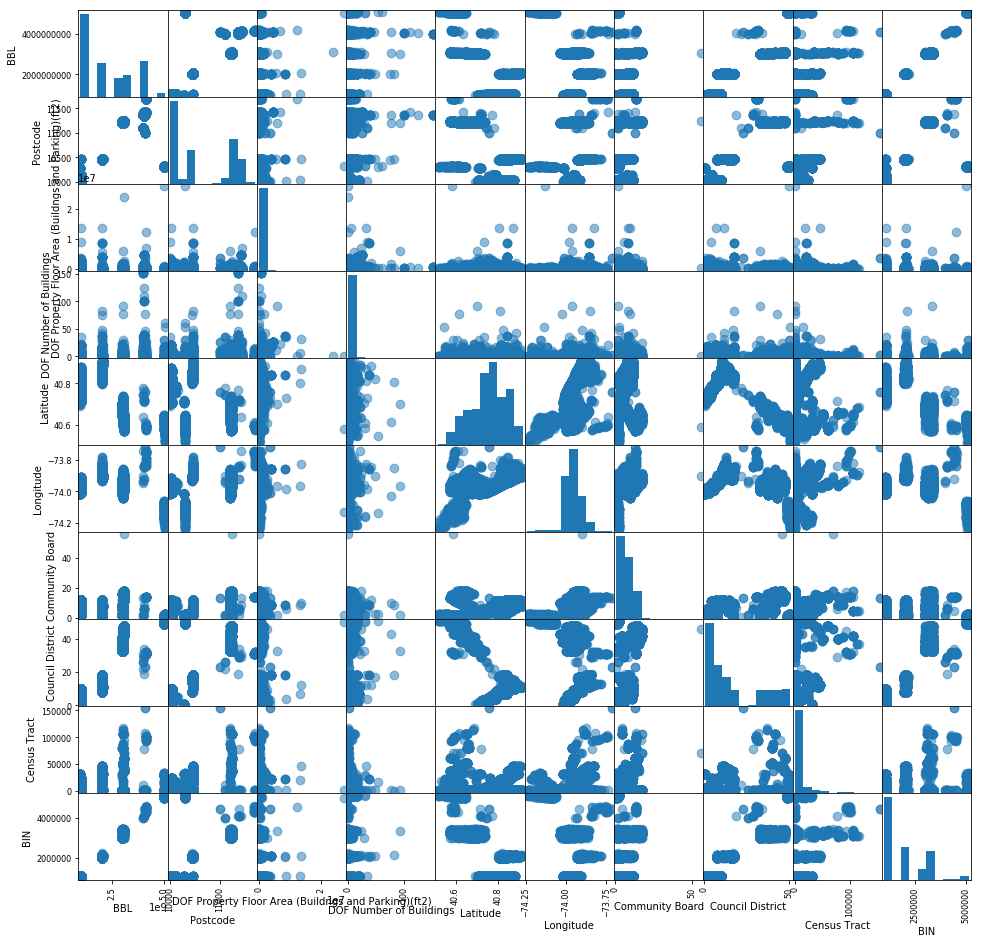

In [14]:
scatter_matrix (nrg, s=300, figsize=(16, 16));

### Figure above shows the plotting of every plottable column in the dataset against each other.

In [15]:
# Making a new DataFrame with columns we need

newNrg = nrg[['DOF Number of Buildings', 'Site EUI(kBtu/ft2)', 'BBL', 'Reported Property Floor Area (Building(s)) (ft²)']]

In [16]:
# Making a new DataFrame with columns we need

newBsize = bsize[['UnitsTotal', 'YearBuilt', 'UnitsRes', 'BBL']]

In [17]:
newBsize.columns

Index(['UnitsTotal', 'YearBuilt', 'UnitsRes', 'BBL'], dtype='object')

In [18]:
newNrg.columns

Index(['DOF Number of Buildings', 'Site EUI(kBtu/ft2)', 'BBL',
       'Reported Property Floor Area (Building(s)) (ft²)'],
      dtype='object')

In [19]:
# Converting to numeric by using pd.to_numeric

def num(df):
    for i in range(len(df.columns)):
        pd.to_numeric(df.iloc[:, i], errors='coerce')
    return df

In [20]:
num(newNrg);

In [21]:
num(newBsize);

In [22]:
newNrg.head()

,DOF Number of Buildings,Site EUI(kBtu/ft2),BBL,Reported Property Floor Area (Building(s)) (ft²)
Record Number,,,,
12086,NaN,NaN,1.000410e+09,918919
14354,1.0,NaN,4.021460e+09,NaN
12150,NaN,NaN,2.027620e+09,64200
12590,1.0,NaN,1.006700e+09,NaN
15591,NaN,NaN,2.048300e+09,50000


In [23]:
newBsize.head()

,UnitsTotal,YearBuilt,UnitsRes,BBL
0,0,1900,0,1.000010e+09
1,0,1987,0,1.000090e+09
2,602,1902,500,1.000158e+09
3,50,1900,0,1.000130e+09
4,0,1900,0,1.000010e+09


In [24]:
# Checking the columns to be float

newBsize.BBL.astype(float)

0        1.000010e+09
1        1.000090e+09
2        1.000158e+09
3        1.000130e+09
4        1.000010e+09
5        1.000010e+09
6        1.000130e+09
7        1.000090e+09
8        1.000030e+09
9        1.000120e+09
10       1.000030e+09
11       1.000168e+09
12       1.000160e+09
13       1.000030e+09
14       1.000120e+09
15       1.000030e+09
16       1.000030e+09
17       1.000130e+09
18       1.000090e+09
19       1.000090e+09
20       1.000300e+09
21       1.000328e+09
22       1.000318e+09
23       1.000080e+09
24       1.000290e+09
25       1.000290e+09
26       1.000390e+09
27       1.000020e+09
28       1.000350e+09
29       1.000070e+09
             ...     
42656    1.008968e+09
42657    1.010778e+09
42658    1.010478e+09
42659    1.013428e+09
42660    1.014298e+09
42661    1.014738e+09
42662    1.018878e+09
42663    1.018438e+09
42664    1.016308e+09
42665    1.018318e+09
42666    1.019448e+09
42667    1.018448e+09
42668    1.019438e+09
42669    1.019448e+09
42670    1

In [25]:
(newBsize.BBL.values[0]), (newNrg.BBL.values[0])

(1000010201.0, 1000410001.0)

In [26]:
# Merging the new datasets

bblnrgdata = pd.merge(newNrg, newBsize, on='BBL').dropna()
bblnrgdata.shape

(4765, 7)

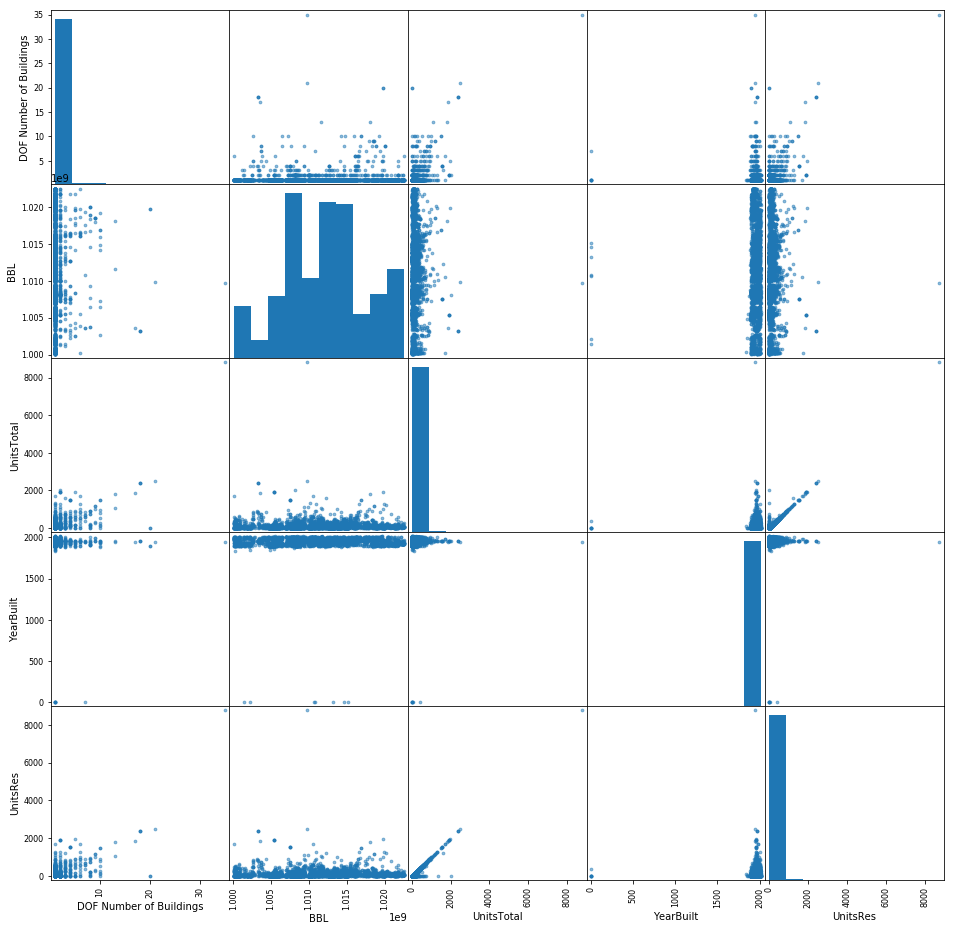

In [27]:
scatter_matrix (bblnrgdata, s=30, figsize=(16, 16));

### Figure 3-1: Scatter matrix of the final dataset. We see the plotting of all the columns in the new dataset named bblnrgdata against each other. 

In [28]:
bblnrgdata.head()

,DOF Number of Buildings,Site EUI(kBtu/ft2),BBL,Reported Property Floor Area (Building(s)) (ft²),UnitsTotal,YearBuilt,UnitsRes
2,1.0,125.4,1.013110e+09,330000,56,1977,0
15,1.0,122.3,1.007660e+09,59468,8,1912,0
16,1.0,117,1.008150e+09,364000,24,1954,0
18,1.0,82.1,1.005050e+09,235370,24,1926,0
19,1.0,137.7,1.021420e+09,64806,62,1924,54


In [29]:
bblnrgdata.columns

Index(['DOF Number of Buildings', 'Site EUI(kBtu/ft2)', 'BBL',
       'Reported Property Floor Area (Building(s)) (ft²)', 'UnitsTotal',
       'YearBuilt', 'UnitsRes'],
      dtype='object')

In [31]:
# scatter plot first of Energy vs Units
# for some reason, the num function to convert pd.to_numeric didn't work previously
# it didn't work even with num(bblnrgdata), so I am going to separately convert columns below to numeric

a = pd.to_numeric(bblnrgdata['Reported Property Floor Area (Building(s)) (ft²)'], errors='coerce')
b = pd.to_numeric(bblnrgdata['Site EUI(kBtu/ft2)'], errors='coerce')

bblnrgdata['Total Energy'] = a * b

In [32]:
bblnrgdata.head()

,DOF Number of Buildings,Site EUI(kBtu/ft2),BBL,Reported Property Floor Area (Building(s)) (ft²),UnitsTotal,YearBuilt,UnitsRes,Total Energy
2,1.0,125.4,1.013110e+09,330000,56,1977,0,41382000.0
15,1.0,122.3,1.007660e+09,59468,8,1912,0,7272936.4
16,1.0,117,1.008150e+09,364000,24,1954,0,42588000.0
18,1.0,82.1,1.005050e+09,235370,24,1926,0,19323877.0
19,1.0,137.7,1.021420e+09,64806,62,1924,54,8923786.2


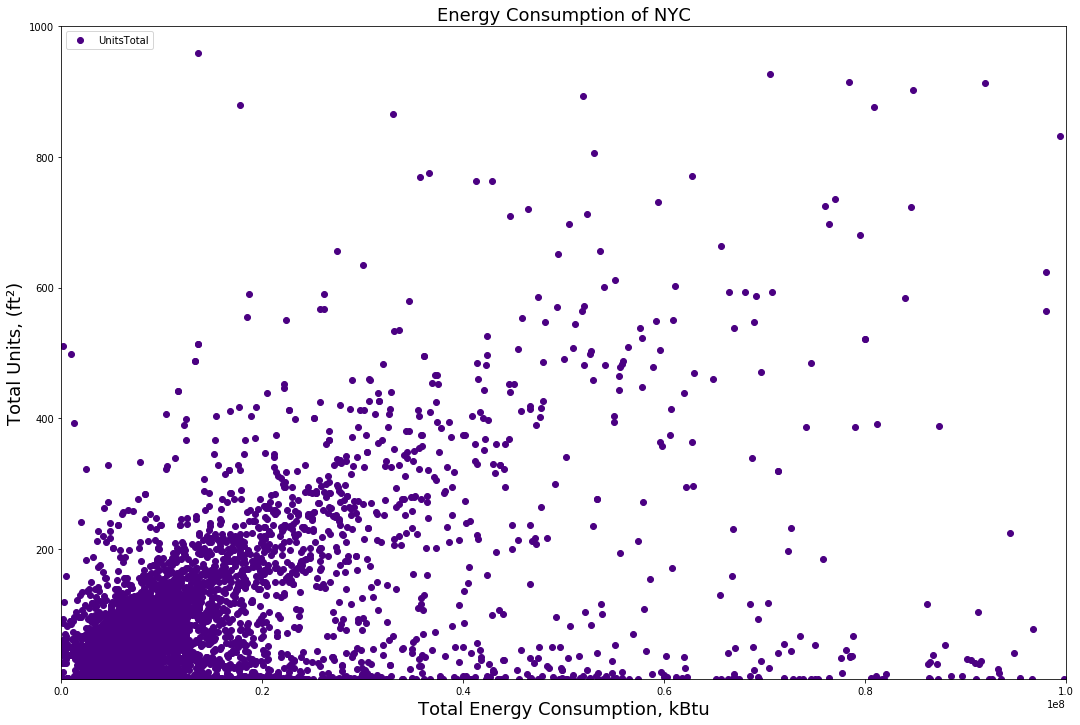

In [33]:
# plotting total energy vs total units

fig = figsize(18, 12)

pl.plot(bblnrgdata['Total Energy'], bblnrgdata['UnitsTotal'], 'o', c='indigo', figure=fig)
pl.xlabel('Total Energy Consumption, kBtu', fontsize=18)
pl.ylabel('Total Units, (ft²)', fontsize=18)
pl.title('Energy Consumption of NYC', fontsize=18)
pl.xlim([1000,1e8])
pl.ylim([1,1000])
pl.legend()
pl.show()

### Figure 3-2: The figure shows the total energy consumption, kBtu, plotted against total units, (ft²).

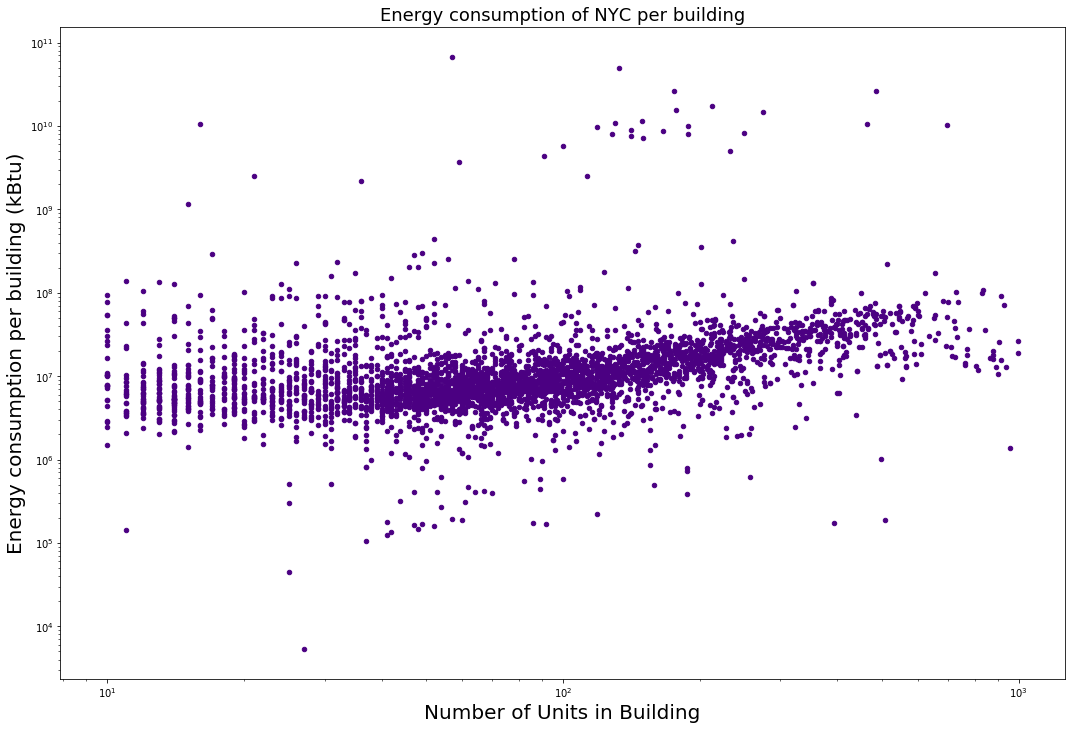

In [34]:
# Plotting energy consumption per building against the number of units

bblnrgdata['nrg'] = bblnrgdata['Total Energy'] / bblnrgdata['DOF Number of Buildings']

bblnrgdataCut = bblnrgdata[(bblnrgdata.nrg > 1000) & (bblnrgdata.UnitsTotal >= 10) & 
                           (bblnrgdata.UnitsTotal<1000)]

ax = bblnrgdataCut.plot(kind='scatter', y='nrg', x='UnitsTotal',
                   marker='o', c='indigo', figsize=(18, 12), loglog=True)
ax.set_title('Energy consumption of NYC per building', fontsize=18)

yl = ax.set_xlabel("Number of Units in Building", fontsize=20)
xl = ax.set_ylabel("Energy consumption per building (kBtu)", fontsize=20)

### Figure 3-3: The figure shows the total energy consumption per building, kBtu, plotted against the number of units in the building

## 4. Fitting a line

## Units vs Energy

In [35]:
bblnrgdataCut.head()

,DOF Number of Buildings,Site EUI(kBtu/ft2),BBL,Reported Property Floor Area (Building(s)) (ft²),UnitsTotal,YearBuilt,UnitsRes,Total Energy,nrg
2,1.0,125.4,1.013110e+09,330000,56,1977,0,41382000.0,41382000.0
16,1.0,117,1.008150e+09,364000,24,1954,0,42588000.0,42588000.0
18,1.0,82.1,1.005050e+09,235370,24,1926,0,19323877.0,19323877.0
19,1.0,137.7,1.021420e+09,64806,62,1924,54,8923786.2,8923786.2
20,1.0,103.2,1.021750e+09,62839,85,1920,75,6484984.8,6484984.8


In [36]:
# logging the values

bblnrgdataCut.loc[:, 'logUnits'] = np.log10(bblnrgdataCut.loc[:, 'UnitsTotal'])
bblnrgdataCut.loc[:, 'logEnergy'] = np.log10(bblnrgdataCut.loc[:, 'Total Energy'])

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [37]:
bblnrgdataCut.head()

,DOF Number of Buildings,Site EUI(kBtu/ft2),BBL,Reported Property Floor Area (Building(s)) (ft²),UnitsTotal,YearBuilt,UnitsRes,Total Energy,nrg,logUnits,logEnergy
2,1.0,125.4,1.013110e+09,330000,56,1977,0,41382000.0,41382000.0,1.748188,7.616811
16,1.0,117,1.008150e+09,364000,24,1954,0,42588000.0,42588000.0,1.380211,7.629287
18,1.0,82.1,1.005050e+09,235370,24,1926,0,19323877.0,19323877.0,1.380211,7.286094
19,1.0,137.7,1.021420e+09,64806,62,1924,54,8923786.2,8923786.2,1.792392,6.950549
20,1.0,103.2,1.021750e+09,62839,85,1920,75,6484984.8,6484984.8,1.929419,6.811909


In [38]:
x1 = bblnrgdataCut['logUnits']
y1 = bblnrgdataCut['logEnergy']

lmEnUn = smf.ols('y1 ~ x1', data=bblnrgdataCut).fit()

In [39]:
lmEnUn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     800.6
Date:                Mon, 23 Oct 2017   Prob (F-statistic):          1.13e-160
Time:                        19:14:02   Log-Likelihood:                -2324.2
No. Observations:                3992   AIC:                             4652.
Df Residuals:                    3990   BIC:                             4665.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.1076      0.034    182.100      0.000         6.042     6.173
x1             0.4908      0.017     28.295      0.000         0.457     0.525
==============================================================================
Omnibus:                     2192.819   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48020.607
Skew:                           2.155   Prob(JB):                         0.00
Kurtosis:                      19.436   Cond. No.                         11.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Looks like R2 value is quite low, 0,167.

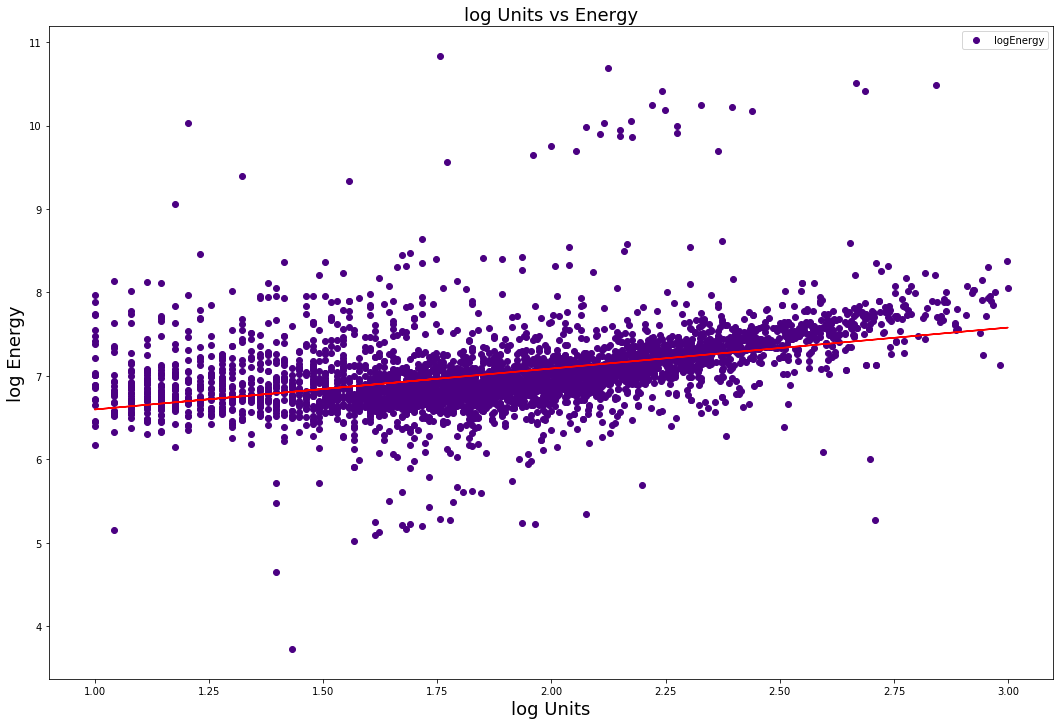

In [40]:
fig = figsize(18, 12)

pl.plot(x1, y1, 'o', c='indigo', figure=fig)
pl.plot(bblnrgdataCut['logUnits'], lmEnUn.predict(),'r')

pl.xlabel('log Units', fontsize=18)
pl.ylabel('log Energy', fontsize=18)
pl.title('log Units vs Energy', fontsize=18)
pl.legend()
pl.show()

### Figure 4-1: Regression line of Energy vs Units. R2 is 0.167

## Energy vs Units

In [41]:
x2 = bblnrgdataCut['logEnergy']
y2 = bblnrgdataCut['logUnits']

lmUnEn = smf.ols('y2 ~ x2', data=bblnrgdataCut).fit()

In [42]:
lmUnEn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     800.6
Date:                Mon, 23 Oct 2017   Prob (F-statistic):          1.13e-160
Time:                        19:14:11   Log-Likelihood:                -1594.5
No. Observations:                3992   AIC:                             3193.
Df Residuals:                    3990   BIC:                             3206.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.5032      0.085     -5.929      0.000        -0.670    -0.337
x2             0.3405      0.012     28.295      0.000         0.317     0.364
==============================================================================
Omnibus:                      153.836   Durbin-Watson:                   1.356
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.715
Skew:                          -0.488   Prob(JB):                     5.16e-38
Kurtosis:                       3.280   Cond. No.                         107.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

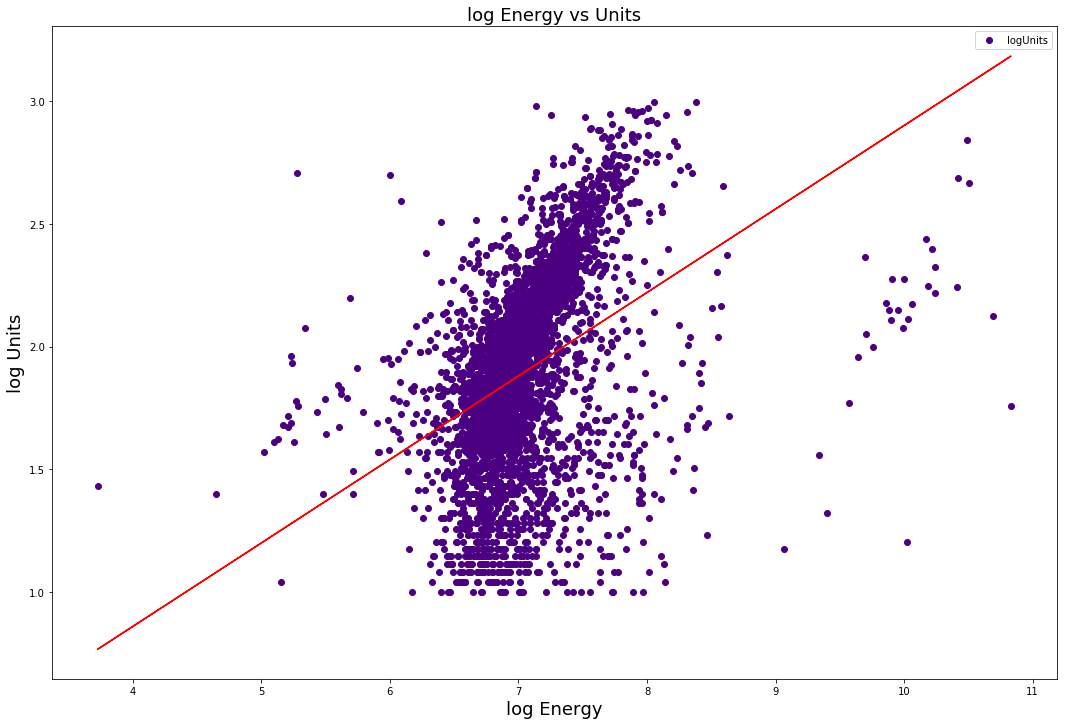

In [43]:
fig = figsize(18, 12)

pl.plot(x2, y2, 'o', c='indigo', figure=fig)
pl.plot(bblnrgdataCut['logEnergy'], lmUnEn.predict(),'r')

pl.xlabel('log Energy', fontsize=18)
pl.ylabel('log Units', fontsize=18)
pl.title('log Energy vs Units', fontsize=18)
pl.legend()
pl.show()

### Figure 4-2: Regression line of Units vs Energy. R2 is 0.167 again.

## 5. Evaluate which is better by calculating the chi square

In [44]:
# Calculating the errors

errUn = np.sqrt(bblnrgdataCut['logUnits'])
errEn = np.sqrt(bblnrgdataCut['logEnergy'])

In [45]:
def chisq(data, model, errors):
    """Calculates the chi-square based on parameters data, model and errors"""
    
    return (((data - model) ** 2) / errors ** 2).sum()

In [46]:
chiUnEn = chisq(x1, y1, errUn) # Units vs Energy
chiEnUn = chisq(x2, y2, errEn) # Energy vs Units

In [47]:
print(chiUnEn, chiEnUn)

60297.9740317 15083.5021826


Since chi-square for Units vs Energy model is higher than that for Energy vs Units, that model needs to be chosen.

## 6. Fit a 2nd degree polynomial

In [48]:
polynomial = smf.ols('y1 ~ I(x1 ** 2) + x1', data=bblnrgdataCut).fit()

In [49]:
polynomial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     603.4
Date:                Mon, 23 Oct 2017   Prob (F-statistic):          1.12e-229
Time:                        19:14:21   Log-Likelihood:                -2161.6
No. Observations:                3992   AIC:                             4329.
Df Residuals:                    3989   BIC:                             4348.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      8.1337      0.115     70.892      0.000         7.909     8.359
I(x1 ** 2)     0.5824      0.032     18.399      0.000         0.520     0.645
x1            -1.7302      0.122    -14.198      0.000        -1.969    -1.491
==============================================================================
Omnibus:                     2363.734   Durbin-Watson:                   1.744
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65676.793
Skew:                           2.316   Prob(JB):                         0.00
Kurtosis:                      22.323   Cond. No.                         118.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

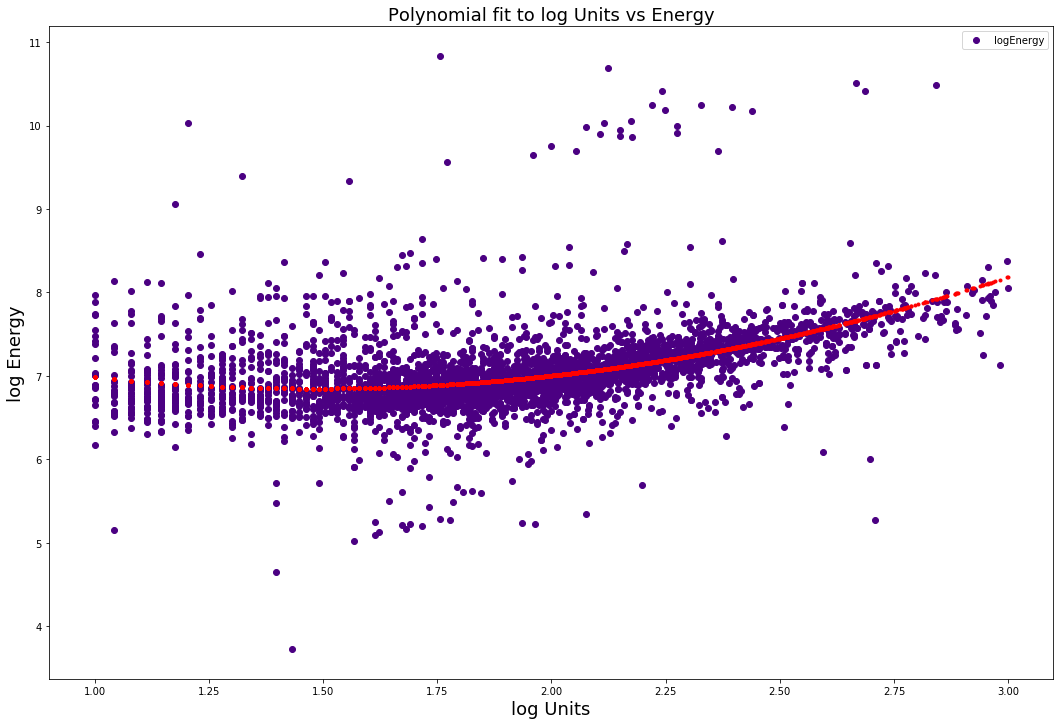

In [50]:
fig = figsize(18, 12)

pl.plot(x1, y1, 'o', c='indigo', figure=fig)
pl.plot(bblnrgdataCut['logUnits'], polynomial.predict(),'.', c='red')

pl.xlabel('log Units', fontsize=18)
pl.ylabel('log Energy', fontsize=18)
pl.title('Polynomial fit to log Units vs Energy', fontsize=18)
pl.legend()
pl.show()

### Figure 6-1: Polynomial regression fit to the model of log Units vs log Energy

## 7. Compare the Units vs Energy line fit and the Units vs Energy 2-nd degree polynomial fit with the Likelihood ratio test

<b> Null Hypothesis:</b> Polynomial regression fits the model the same or worse than the Linear regression.

LR = -2 * (logLikelihood_Model1 - logLikelihood_Model2)

In [51]:
LR = (lmUnEn.llf - polynomial.llf)
print(LR)

567.140284367


Since LR is way bigger than the value of 3.84 in the case of alpha significance of 0.05, the Null is rejected